# Monitoring Temperature Measurements

The following Jupyter Notebook is an attempt to forecast the change in temperature over the last century in several US major cities as well as other European cities. The last section deals with average measured temperature globally which was compiled by the National Oceanic and Atmospheric Administration.

*The link to the datasets is provided in each section*

In [63]:
from fbprophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import pandas as pd
%matplotlib inline

In [53]:
# GRAPHING FUNCITON TO AUTOMATE THE PROCESS
def graphing(m):
    plt.figure(facecolor='w', figsize=(20, 10))

    plt.plot(m.history['ds'],
             m.history['y'], 'k.', 
             marker='+', color='black', alpha=.8)
    plt.plot(forecast['ds'], 
             forecast['yhat'], ls='-')

    plt.plot(
        forecast['ds'],
        forecast['yhat_lower'],
        ls='--',
        alpha=0.5)

    plt.plot(
        forecast['ds'],
        forecast['yhat_upper'],
        ls='--',
        alpha=0.5)

    plt.fill_between(
        forecast['ds'].values,
        forecast['yhat_lower'],
        forecast['yhat_upper'],
        alpha=0.2)
    # plt.axhline(40, color='red', linewidth=.5)
    plt.grid(True, which='major', c='gray', 
             ls='-', lw=1, alpha=0.2)

# Detroit, USA: Daily Temperatures

Data produced from the Historical Hourly Weather Data

[https://www.kaggle.com/selfishgene/historical-hourly-weather-data]

In [3]:
dataset = pd.read_csv('weather-complete.csv', 
                      skiprows = 1, names=['ds','y'])
dataset.head(10)

,ds,y
0,2012-10-01,11.036840
1,2012-10-02,14.340558
2,2012-10-03,14.518382
3,2012-10-04,16.820351
4,2012-10-05,16.948431
5,2012-10-06,14.359844
6,2012-10-07,6.294671
7,2012-10-08,7.197116
8,2012-10-09,7.406418
9,2012-10-10,6.551053


In [4]:
model_detroit = Prophet(daily_seasonality=True)
model_detroit.fit(dataset)
future = model_detroit.make_future_dataframe(periods=1461, freq='d')
forecast = model_detroit.predict(future)

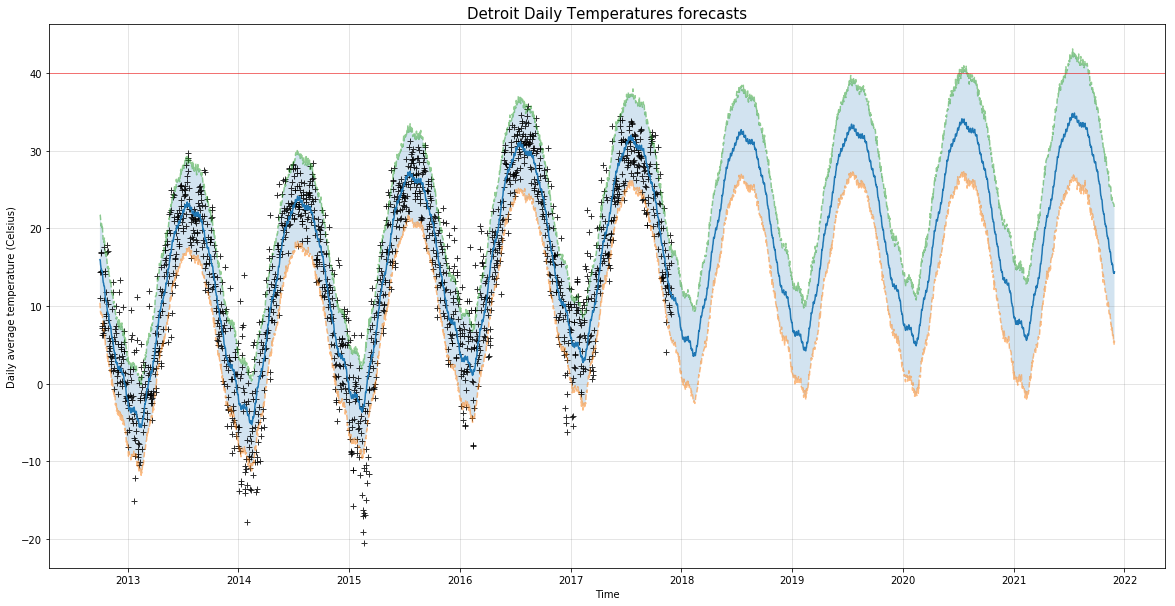

In [5]:
graphing(model_detroit)
plt.xlabel('Time')
plt.ylabel('Daily average temperature (Celsius)')
plt.title('Detroit Daily Temperatures forecasts', 
          fontsize=15)
plt.show()

# Seattle, USA: Daily Temperatures

This data was collected at the Seattle-Tacoma International Airport from January 1st, 1948 to December 12, 2017.

[https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017]

In [6]:
seattle = pd.read_csv('seattleWeather.csv')
seattle['y'] = (seattle.TMAX + seattle.TMIN)/2
seattle = seattle.drop(['PRCP','TMAX', 'TMIN', 'RAIN'], axis=1)
seattle.rename(columns={'DATE':'ds'}, inplace=True)
seattle['ds'] = pd.to_datetime(seattle['ds'])
seattle.head(10)

,ds,y
0,1948-01-01,46.5
1,1948-01-02,40.5
2,1948-01-03,40.0
3,1948-01-04,39.5
4,1948-01-05,38.5
5,1948-01-06,43.5
6,1948-01-07,45.0
7,1948-01-08,41.5
8,1948-01-09,40.5
9,1948-01-10,38.5


In [7]:
model_seattle = Prophet(daily_seasonality=True)
model_seattle.fit(dataset)
future = model_seattle.make_future_dataframe(periods=1461, freq='d')
forecast = model_seattle.predict(future)

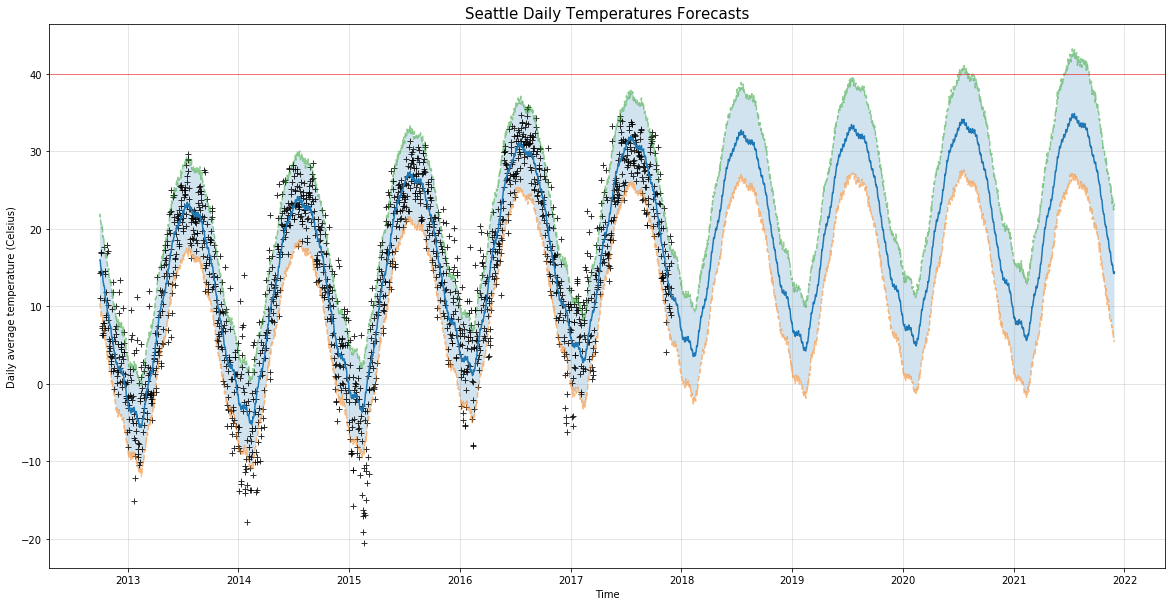

In [8]:
graphing(model_seattle)
plt.xlabel('Time')
plt.ylabel('Daily average temperature (Celsius)')
plt.title('Seattle Daily Temperatures Forecasts', 
          fontsize=15)
plt.show()

# Szeged, Hungary: Hourly Temperatures

The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

[https://www.kaggle.com/budincsevity/szeged-weather]

In [9]:
szeged = pd.read_csv('weatherHistoryszeged.csv')
szeged = szeged.filter(['Formatted Date','Temperature (C)'], axis=1)
szeged.rename(columns={'Formatted Date':'ds', 'Temperature (C)':'y'}, inplace=True)
szeged['ds'] = pd.to_datetime(szeged['ds'])
szeged.head(10)

,ds,y
0,2006-03-31 22:00:00,9.472222
1,2006-03-31 23:00:00,9.355556
2,2006-04-01 00:00:00,9.377778
3,2006-04-01 01:00:00,8.288889
4,2006-04-01 02:00:00,8.755556
5,2006-04-01 03:00:00,9.222222
6,2006-04-01 04:00:00,7.733333
7,2006-04-01 05:00:00,8.772222
8,2006-04-01 06:00:00,10.822222
9,2006-04-01 07:00:00,13.772222


In [10]:
model_szeged = Prophet(daily_seasonality=True)
model_szeged.fit(dataset)
future = model_szeged.make_future_dataframe(periods=1500, freq='d')
forecast = model_szeged.predict(future)

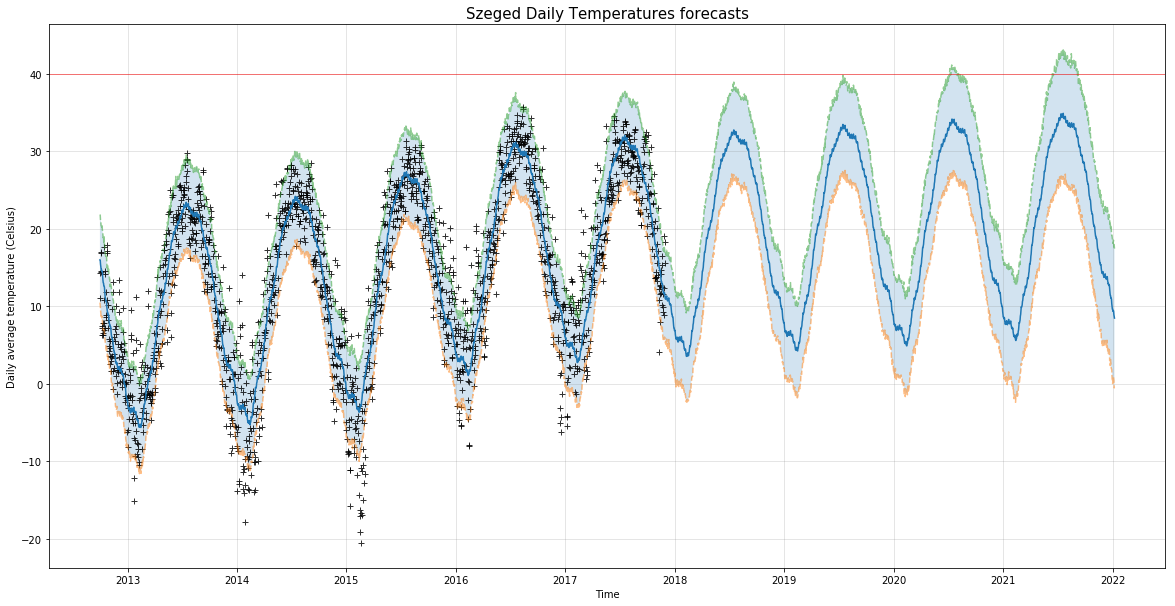

In [11]:
graphing(model_szeged)
plt.xlabel('Time')
plt.ylabel('Daily average temperature (Celsius)')
plt.title('Szeged Daily Temperatures forecasts', 
          fontsize=15)
plt.show()

# Algiers, Algeria: Monthly Temperatures

[https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data]

In [16]:
algeria = pd.read_csv('Land Temperature Algeria by Cities.csv')
algeria['dt'] = pd.to_datetime(algeria['dt'])
algeria.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1753-01-01,5.460,5.658,Algiers,Algeria,36.17N,3.98E
1,1753-02-01,7.472,3.294,Algiers,Algeria,36.17N,3.98E
2,1753-03-01,12.400,2.868,Algiers,Algeria,36.17N,3.98E
3,1753-04-01,13.662,5.562,Algiers,Algeria,36.17N,3.98E
4,1753-05-01,18.894,2.198,Algiers,Algeria,36.17N,3.98E


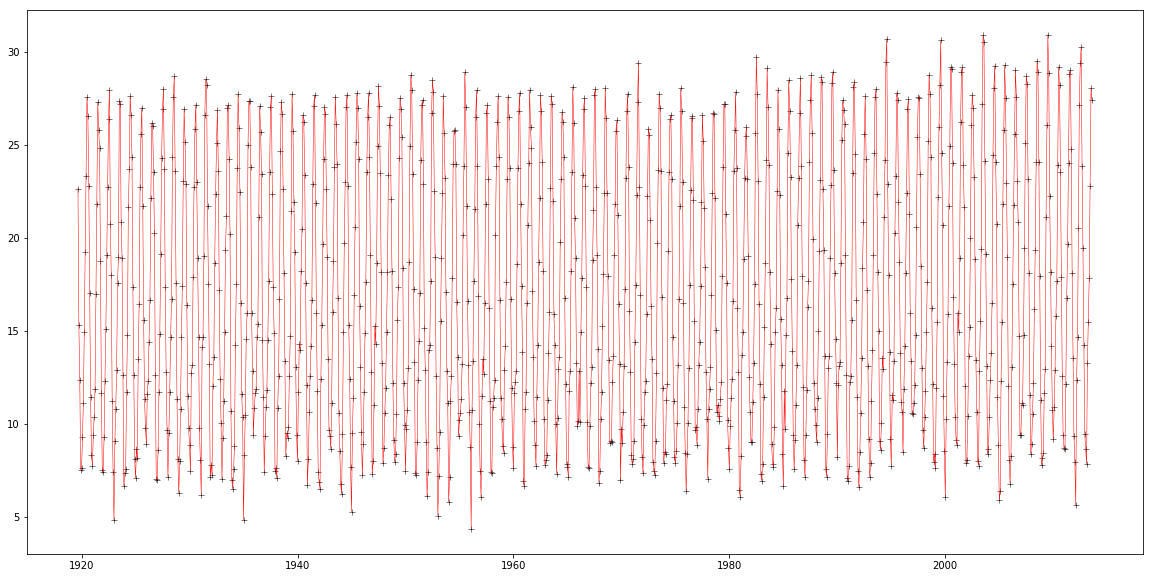

In [31]:
plt.figure(figsize=(20, 10))
plt.scatter(algeria.dt[2000:], 
            algeria.AverageTemperature[2000:],
           marker='+', linewidth=.5, color='black')
plt.plot(algeria.dt[2000:], algeria.AverageTemperature[2000:],
        linewidth=0.5, color='red')
plt.show()

# Global Temperature Measurements

[https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data]

In [35]:
glo_temp = pd.read_csv('GlobalTemperatures.csv')
glo_temp['dt'] = pd.to_datetime(glo_temp['dt'])
glo_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


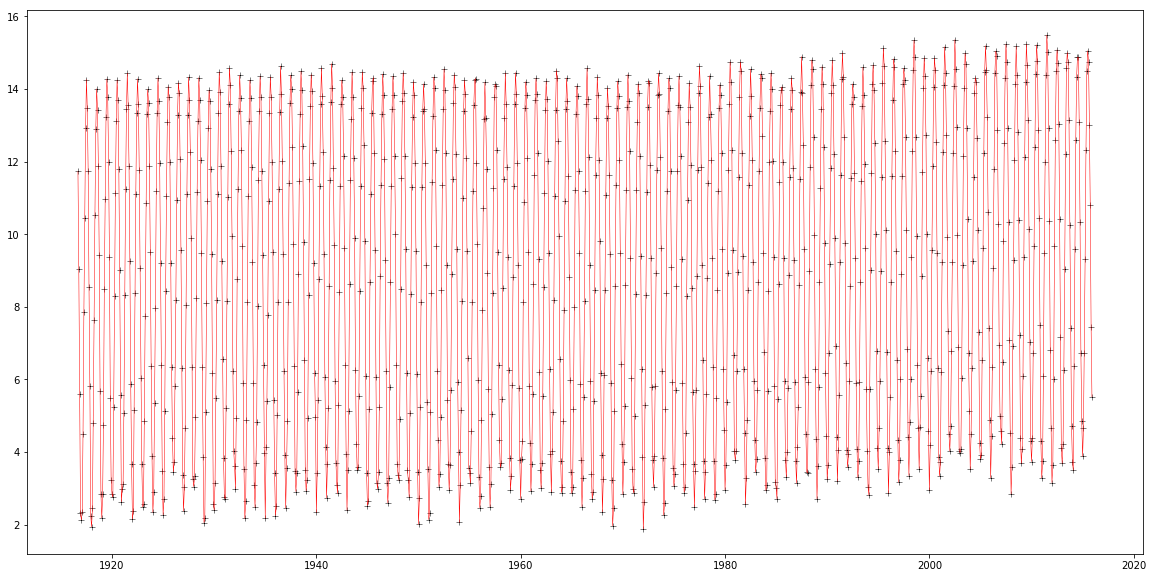

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(glo_temp.dt[2000:], 
            glo_temp.LandAverageTemperature[2000:],
           marker='+', linewidth=.5, color='black')
plt.plot(glo_temp.dt[2000:], 
         glo_temp.LandAverageTemperature[2000:],
         linewidth=0.5, color='red')
plt.show()

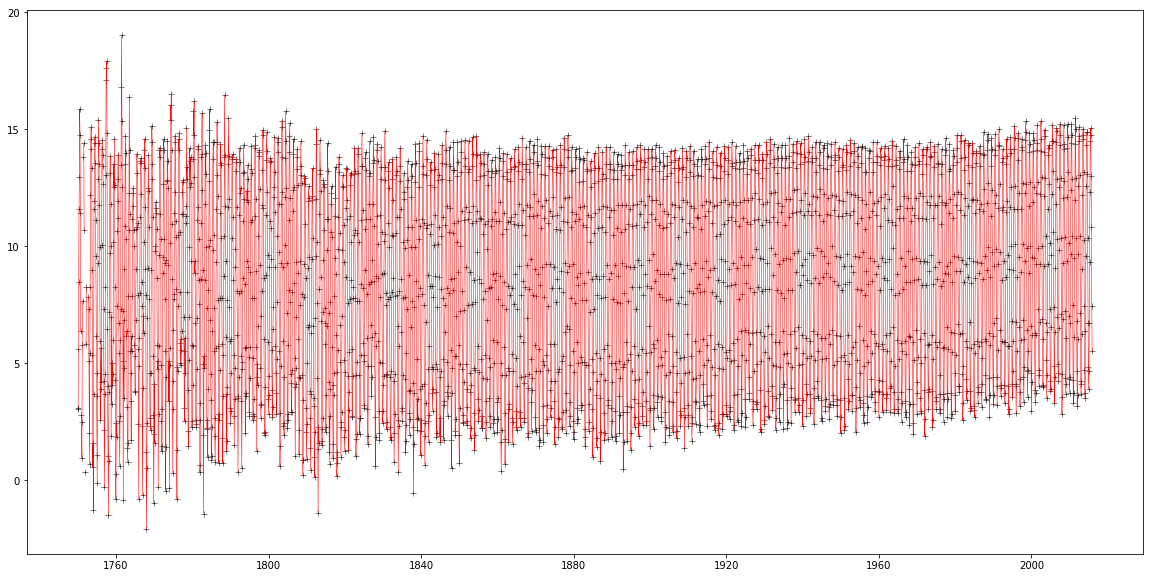

In [38]:
plt.figure(figsize=(20, 10))
plt.scatter(glo_temp.dt, 
            glo_temp.LandAverageTemperature,
           marker='+', linewidth=.5, color='black')
plt.plot(glo_temp.dt, 
         glo_temp.LandAverageTemperature,
         linewidth=0.5, color='red')
plt.show()

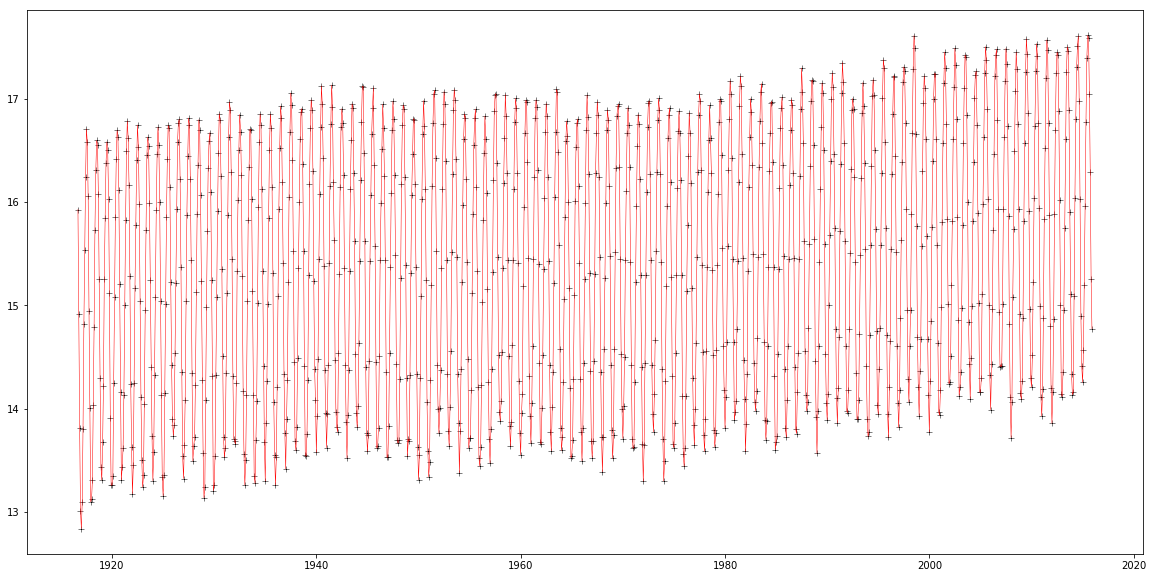

In [39]:
plt.figure(figsize=(20, 10))
plt.scatter(glo_temp.dt[2000:], 
            glo_temp.LandAndOceanAverageTemperature[2000:],
           marker='+', linewidth=.5, color='black')
plt.plot(glo_temp.dt[2000:], 
         glo_temp.LandAndOceanAverageTemperature[2000:],
         linewidth=0.5, color='red')
plt.show()

In [49]:
land_ocean = glo_temp.filter(['dt',
            'LandAndOceanAverageTemperature'], axis=1)
land_ocean.rename(columns={'dt':'ds', 
                  'LandAndOceanAverageTemperature':'y'}, inplace=True)
land_ocean = land_ocean.dropna()
land_ocean.head()

,ds,y
1200,1850-01-01,12.833
1201,1850-02-01,13.588
1202,1850-03-01,14.043
1203,1850-04-01,14.667
1204,1850-05-01,15.507


In [84]:
model_global = Prophet()
model_global.fit(land_ocean)
future = model_global.make_future_dataframe(periods=400, freq='m')
forecast = model_global.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


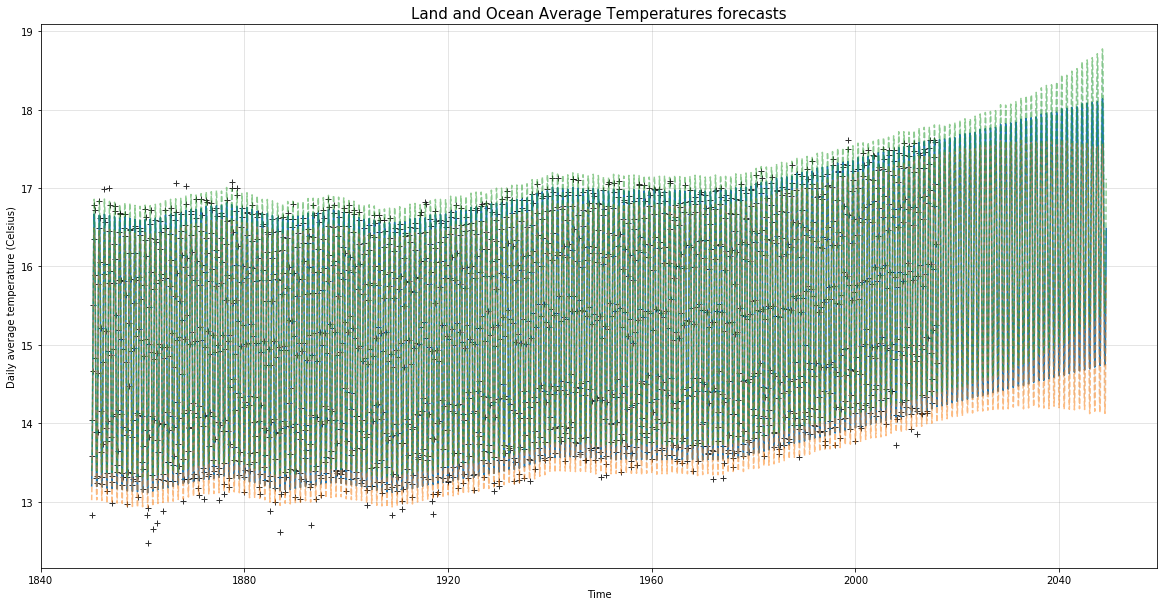

In [85]:
graphing(model_global)
plt.xlabel('Time')
plt.ylabel('Daily average temperature (Celsius)')
plt.title('Land and Ocean Average Temperatures forecasts', 
          fontsize=15)
plt.show()

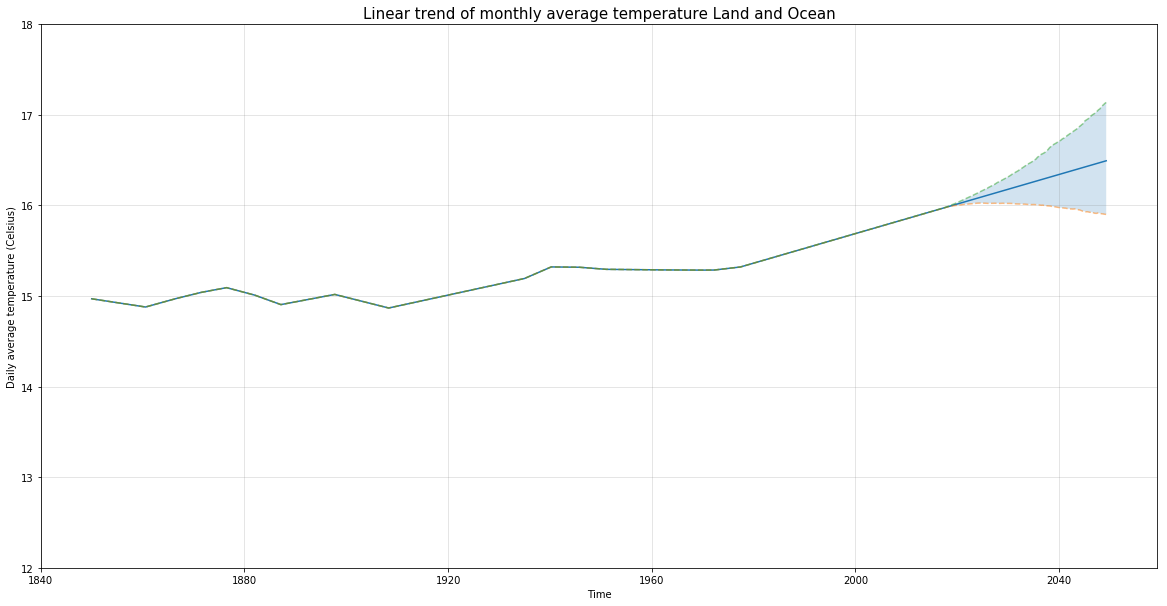

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(forecast.ds, forecast.trend)
plt.plot(
        forecast['ds'],
        forecast['trend_lower'],
        ls='--',
        alpha=0.5)
plt.plot(
        forecast['ds'],
        forecast['trend_upper'],
        ls='--',
        alpha=0.5)
plt.fill_between(
        forecast['ds'].values,
        forecast['trend_lower'],
        forecast['trend_upper'],
        alpha=0.2)
plt.grid(True, which='major', c='gray', 
        ls='-', lw=1, alpha=0.2)
plt.ylim(12, 18)
plt.xlabel('Time')
plt.ylabel('Daily average temperature (Celsius)')
plt.title('Linear trend of monthly average temperature Land and Ocean',
          fontsize=15)
plt.show()